# Importing scipy

In [125]:
import scipy 

#checking version
scipy.__version__

'1.4.1'

###### To check more fiunctions in the modules that will be treated below:

1. Use the help() function
2. use the info() function
##### E.g
###### from scipy import linalg
###### help(linalg)
   ###### or

   ###### linalg.info()

# File io

 

In [5]:
from scipy import io
import numpy as np
# saving and loading file
arr = np.random.randn(5, 5)
io.savemat('file.mat', {'array': arr}) # savemat expects a dictionary
data = io.loadmat('file.mat')
data['array']

array([[ 0.08852573, -0.10925536, -0.24424725,  0.04466127, -0.64772483],
       [-1.25948179,  1.28409586,  0.6207288 ,  0.13098027,  1.51270377],
       [-1.44294166,  0.15777354,  0.18541826,  0.39534502,  0.44024521],
       [ 0.2986464 ,  0.10303727, -0.17281329,  0.33307897, -3.14847432],
       [ 0.43377702, -0.38705736,  0.37453314, -0.58838824,  1.06251893]])

# linalg
#### scipy.linalg provide standard linear algebra operations

In [6]:
#determinant of a square matrix
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

-2.0

In [7]:
# inverse of a square matrix
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# Interpolate

###### scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists.

####### scipy.interpolate.interp2d is for 2D arrays
####### scipy.interpolate.interp1d is for 1D arrays


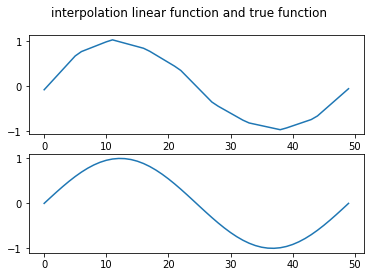

In [27]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

measured_time = np.linspace(0, 1, 10)  #think of the values of x
function = np.sin(2 * np.pi * measured_time)  # think of it as y
noise = (np.random.random(10)*2 - 1) * 1e-1   # noise to data 
measures_with_noise = np.sin(2 * np.pi * measured_time) + noise 

# scipy.interpolate.interp1d can build a linear interpolation function:
linear_interp = interp1d(measured_time, measures_with_noise)

# Then the result can be evaluated at the time of interest
interpolation_time = np.linspace(0, 1, 50)  # think of it as new points for test
function = np.sin(2 * np.pi * interpolation_time) # true result
result =linear_interp(interpolation_time)   #interpolation result

fig, axs = plt.subplots(2)
fig.suptitle('interpolation linear function and true function ')
axs[0].plot(linear_interp(interpolation_time))   #interpolation result
axs[1].plot(function)   #true result


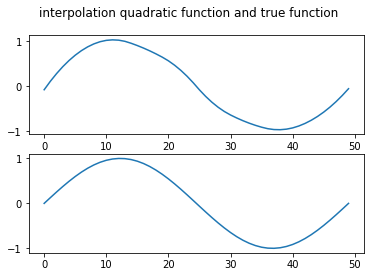

In [29]:
# scipy.interpolate.interp1d have a kind parameter  so you can specify quadratic, cubic
#linear is the default parameter for kind
linear_interp2 = interp1d(measured_time, measures_with_noise, kind='quadratic')

result =linear_interp2(interpolation_time)   #interpolation result 

fig, axs = plt.subplots(2)
fig.suptitle('interpolation quadratic function and true function ')
axs[0].plot(linear_interp2(interpolation_time))   #interpolation result
axs[1].plot(function)   #true result


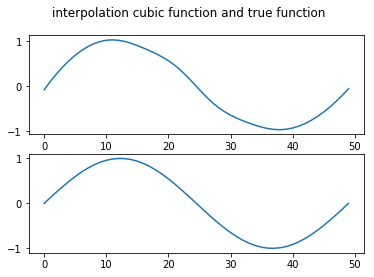

In [31]:

linear_interp3 = interp1d(measured_time, measures_with_noise, kind='cubic')

result =linear_interp3(interpolation_time)   #interpolation result 

fig, axs = plt.subplots(2)
fig.suptitle('interpolation cubic function and true function ')
axs[0].plot(linear_interp3(interpolation_time))   #interpolation result
axs[1].plot(function)   #true result


# Optimize

###### The optimization package in SciPy allows us to solve minimization problems easily and quickly 
Some classic examples are performing linear regression, finding a function’s minimum and maximum values, determining the root of a function, and finding where two functions intersect.

#### Curve fitting

There are several ways to fit data with a linear regression. In this section we will use
curve_fit(a best-fit method). In the
example below, we generate data from a known function with noise, and then fit the
noisy data with curve_fit. The function we will model in the example is a simple linear
equation, f (x) = ax + b.

In [70]:
import numpy as np
from scipy.optimize import curve_fit
# Creating a function to model and create data
def func(x, a, b):
    return a * x + b

# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)

# Adding noise to the data
np.random.seed(10)
yn = y + 0.9 * np.random.normal(size=len(x))

# Executing curve_fit on noisy data
params, param_cov=curve_fit(func, x, yn)

print(params)   # gives values for the fit i.e [a b]

#seems it was a good fit since the  0.97682373 is close to 1 and
# 2.18735634 is slightly above 2


[0.97682373 2.18735634]


####  Finding the minimum of a scalar function

Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it returns the location of the minimum that it has found



array([-0.5])

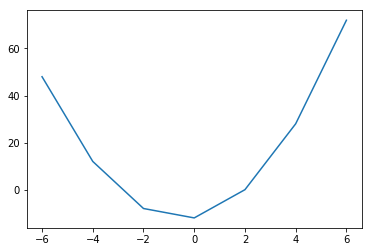

In [116]:
from scipy import optimize
#plot a function
def func(x):
    return 2*(x**2)+ (2*x) -12
x = np.array([-6,-4,-2,0,2,4,6])
plt.plot(x, func(x)) 


#find minimum
result = optimize.minimize(func, x0=0)
result.x     # The coordinate of the minimum 


So in optimize.minimize there is method parameter where you specify methods to help you find the minimum of your function

#### Finding the roots of a scalar function

We can find the root of the function above using the root method in scipy.optimize

In [122]:
func_root = optimize.root(func, x0=4)   # initial guess is 4
print(func_root.x) 

#notice it gives 2
# but we are mean to have two roots since it is a quadratic function 
#change the initial guess to a negative number and see the result

[2.]


# Stats

###### The module scipy.stats contains statistical tools and probabilistic descriptions of random processes

In NumPy there are basic statistical functions like mean, std, median, argmax, and argmin.
Moreover, the numpy.arrays have built-in methods that allow us to use most of the
NumPy statistics easily.

For quick calculations these methods are useful, but more is usually needed for quantitative
research. SciPy offers an extended collection of statistical tools such as distributions
(continuous or discrete) and functions.


There are roughly 80 continuous distributions and over 10 discrete distributions.
Twenty of the continuous functions are shown in Fig below as probability density
functions (PDFs) to give a visual impression of what the scipy.stats package provides.
These distributions are useful as random number generators, similar to the functions
found in numpy.random. Yet the rich variety of functions SciPy provides stands in contrast
to the numpy.random functions, which are limited to uniform and Gaussian-like
distributions.

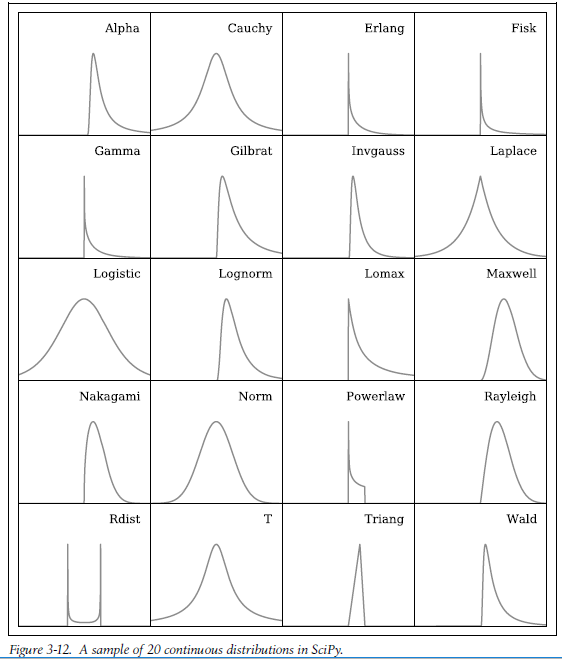

In [ ]:
# Focussing on normal distribution

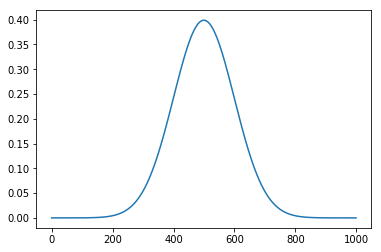

In [135]:
import numpy as np
from scipy.stats import norm
# Set up the sample range
x = np.linspace(-5,5,1000)

# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.
dist = norm(loc=0, scale=1)

# Retrieving norm's PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)  #cummulative density function

plt.plot(pdf)

There are alot of functions in scipy.stats for testing or describing our data

Two of the functions i will focus on is normaltest and kstest(Kolmogorov-Smirnov test)

In [137]:
import numpy as np
from scipy import stats
# Generating a normal distribution sample
# with 100 elements
sample = np.random.randn(100)

# normaltest tests the null hypothesis.
out = stats.normaltest(sample)
print('normaltest output')
print(out)


# kstest is the Kolmogorov-Smirnov test for goodness of fit.
# Here its sample is being tested against the normal distribution.
# D is the KS statistic and the closer it is to 0 the better.
out1 = stats.kstest(sample, 'norm')
print('\nkstest output for the Normal distribution')
print(out1)


# Similarly, this can be easily tested against other distributions,
# like the cauchy distribution.
out3 = stats.kstest(sample, 'cauchy')
print('\nkstest output for the cauchy distribution')
print(out3)


normaltest output
NormaltestResult(statistic=0.6791182536652447, pvalue=0.7120841923825143)

kstest output for the Normal distribution
KstestResult(statistic=0.07487657775835593, pvalue=0.620642552218031)

kstest output for the cauchy distribution
KstestResult(statistic=0.16614155060824887, pvalue=0.007006180192257383)


# Integration
SciPy has a range of different functions to integrate equations and data.

The most generic integration routine is scipy.integrate.quad()

Other integration schemes are scipy.integrate.fixed_quad(), scipy.integrate.quadrature(), scipy.integrate.romberg()

scipy.integrate also features routines for integrating Ordinary Differential Equations (ODE).e.g scipy.integrate.odeint()
 
 

In [2]:
# simple integration exmample

import numpy as np
from scipy.integrate import quad

# Defining function to integrate
func = lambda x: np.cos(np.exp(x)) ** 2    

# Integrating function with lower and upper
# limits of 0 and 3, respectively
solution = quad(func, 0, 3)
print (solution)

# The first element is the desired value
# and the second is the error.
# (1.296467785724373, 1.397797186265988e-09)

(1.296467785724373, 1.3977971853986262e-09)


In [3]:
# Let’s move on to a problem where we are given data instead of some known equation like the above example

import numpy as np
from scipy.integrate import quad, trapz
# Setting up fake data
x = np.sort(np.random.randn(150) * 4 + 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)
# Integrating function with lower and upper
# limits of 0 and 5, respectively
fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)

print('fsolution = ' + str(fsolution[0]))
print('dsolution = ' + str(dsolution))
print('The difference is ' + str(np.abs(fsolution[0] - dsolution)))

#The quad integrator can onlyworkwith a callable function, whereas trapz is a numerical
#integrator that utilizes data points.

fsolution = 5.100345067540932
dsolution = 5.2330017603621215
The difference is 0.13265669282118964


## The End
For more exploratory research you can visit https://scipy-lectures.org/intro/index.html


I also recommmend this book: SciPy and NumPy
by Eli Bressert 